# **EfficientNet_B0 Training**

This notebook trains a EfficientNet_B0 model on the brain hemorrhage dataset.

In [1]:
from IPython.display import display, HTML
from tqdm.notebook import tqdm
import subprocess

# --- Phase 1: Lightweight packages ---
phase1 = [
    "scikit-learn",
    "torch",
    "matplotlib",
    "seaborn",
    "ultralytics",
    "pandas"
]

# --- Function to install packages with live output ---
def install_packages(package_list, phase_name):
    logs = []
    display(HTML(f"<h3>🚀 Starting {phase_name}</h3>"))
    for pkg in tqdm(package_list, desc=f"{phase_name}", unit="pkg"):
        display(HTML(f"<b>Installing:</b> {pkg}"))
        process = subprocess.Popen(
            ["pip", "install", "--no-cache-dir", "--upgrade", pkg],
            stdout=subprocess.PIPE,
            stderr=subprocess.STDOUT,
            text=True
        )
        output = ""
        for line in process.stdout:
            output += line
        process.wait()
        logs.append(f"📦 {pkg}\n{output}")
    return logs

# --- Run both phases ---
logs_phase1 = install_packages(phase1, "Phase 1: Core Packages")

# --- Display combined logs ---
all_logs = logs_phase1
scrollable_logs = (
    "<pre style='max-height: 400px; overflow-y: scroll; border: 1px solid #ccc; padding: 10px;'>"
    + "\n\n".join(all_logs) + "</pre>"
)
display(HTML(scrollable_logs))

Phase 1: Core Packages:   0%|          | 0/6 [00:00<?, ?pkg/s]

In [2]:
# !pip install matplotlib torch
# !pip install ultralytics

## Load the CSV files

In [3]:
!pip install "numpy<2.0" pandas --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 102.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.3 which is incompatible.
cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.3 which is incompatible.
datasets 4.4.1 requires pyarrow>=21.0.0, but you have pyarrow 19.0.1 which is incompatible.
ydata-profiling 4.17.0 requires matplotlib<=3.10,>=3.5, but you have matplotlib 3.10.7 which is incompatible.
catego

In [4]:
import pandas as pd
import re

hem_data = pd.read_csv("/kaggle/input/computed-tomography-ct-images/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.0.0/hemorrhage_diagnosis.csv")
hem_data.head()

,PatientNumber,SliceNumber,Intraventricular,Intraparenchymal,Subarachnoid,Epidural,Subdural,No_Hemorrhage,Fracture_Yes_No
0,49,1,0,0,0,0,0,1,0
1,49,2,0,0,0,0,0,1,0
2,49,3,0,0,0,0,0,1,0
3,49,4,0,0,0,0,0,1,0
4,49,5,0,0,0,0,0,1,0


Base dir : /kaggle/input/computed-tomography-ct-images/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.0.0
Image dir: /kaggle/input/computed-tomography-ct-images/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.0.0/Patients_CT
Example patient folders: ['057', '086', '121', '061', '053']

Hemorrhage diagnosis shape: (2501, 9)
Demographics shape        : (82, 11)


,PatientNumber,SliceNumber,Intraventricular,Intraparenchymal,Subarachnoid,Epidural,Subdural,No_Hemorrhage,Fracture_Yes_No
0,49,1,0,0,0,0,0,1,0
1,49,2,0,0,0,0,0,1,0
2,49,3,0,0,0,0,0,1,0
3,49,4,0,0,0,0,0,1,0
4,49,5,0,0,0,0,0,1,0


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Patient Number,Age\n(years),Gender,Intraventricular,Intraparenchymal,Subarachnoid,Epidural,Subdural,Fracture (Yes/No),Condition on file,Note
0,49,35.000000,Male,NaN,1.0,NaN,1.0,NaN,1.0,Intracranial HGE+ Extradural HGE,NaN
1,50,0.583333,Female,NaN,1.0,NaN,NaN,NaN,1.0,Subdural HGE,NaN
2,51,5.000000,Male,NaN,1.0,NaN,NaN,1.0,1.0,Extadural HGE,NaN
3,52,8.000000,Male,NaN,NaN,NaN,1.0,NaN,1.0,Extadural HGE,NaN
4,53,44.000000,Male,NaN,1.0,NaN,1.0,NaN,1.0,Intracranial HGE+ Extradural HGE,NaN



Hemorrhage dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   PatientNumber     2501 non-null   int64
 1   SliceNumber       2501 non-null   int64
 2   Intraventricular  2501 non-null   int64
 3   Intraparenchymal  2501 non-null   int64
 4   Subarachnoid      2501 non-null   int64
 5   Epidural          2501 non-null   int64
 6   Subdural          2501 non-null   int64
 7   No_Hemorrhage     2501 non-null   int64
 8   Fracture_Yes_No   2501 non-null   int64
dtypes: int64(9)
memory usage: 176.0 KB
None

Label columns: ['Intraventricular', 'Intraparenchymal', 'Subarachnoid', 'Epidural', 'Subdural', 'No_Hemorrhage', 'Fracture_Yes_No']

Positive slices per label:
No_Hemorrhage       2183
Fracture_Yes_No      195
Epidural             173
Intraparenchymal      73
Subdural              56
Intraventricular      24
Subarachnoid   

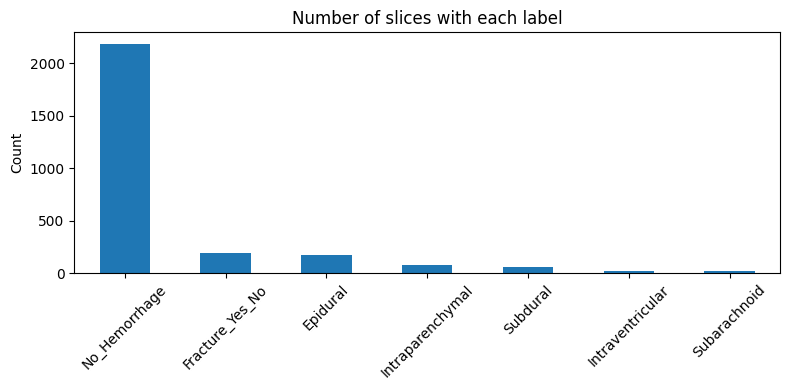

In [5]:
import os

# ---------- Paths ----------
BASE_DIR = "/kaggle/input/computed-tomography-ct-images/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.0.0"
IMG_DIR  = os.path.join(BASE_DIR, "Patients_CT")

print("Base dir :", BASE_DIR)
print("Image dir:", IMG_DIR)
print("Example patient folders:", os.listdir(IMG_DIR)[:5])

# ---------- Load demographics ----------
demo_data = pd.read_csv(os.path.join(BASE_DIR, "patient_demographics.csv"))
print("\nHemorrhage diagnosis shape:", hem_data.shape)
print("Demographics shape        :", demo_data.shape)

display(hem_data.head())
display(demo_data.head())

# ---------- Basic info & label columns ----------
print("\nHemorrhage dataframe info:")
print(hem_data.info())

label_cols = [
    "Intraventricular",
    "Intraparenchymal",
    "Subarachnoid",
    "Epidural",
    "Subdural",
    "No_Hemorrhage",
    "Fracture_Yes_No",
]
print("\nLabel columns:", label_cols)

# make sure numeric columns are actually numeric
for col in ["PatientNumber", "SliceNumber"] + label_cols:
    hem_data[col] = pd.to_numeric(hem_data[col], errors="coerce")

# ---------- Quick label distribution ----------
label_counts = hem_data[label_cols].sum().sort_values(ascending=False)
print("\nPositive slices per label:")
print(label_counts)

# (optional small bar plot)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
label_counts.plot(kind="bar")
plt.title("Number of slices with each label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Link Each CT Image to Its Labels

In [6]:
import os

IMG_DIR = "/kaggle/input/computed-tomography-ct-images/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.0.0/Patients_CT"

folders = os.listdir(IMG_DIR)
print("Patient folders found:", folders)

Patient folders found: ['057', '086', '121', '061', '053', '051', '095', '078', '056', '120', '109', '127', '082', '055', '076', '091', '094', '080', '070', '105', '071', '112', '130', '065', '062', '084', '114', '101', '058', '060', '068', '075', '106', '049', '099', '050', '096', '097', '113', '052', '073', '066', '108', '104', '129', '124', '123', '067', '054', '111', '115', '081', '117', '102', '087', '072', '107', '059', '119', '090', '064', '063', '092', '103', '125', '083', '069', '093', '126', '089', '128', '098', '122', '100', '110', '088', '116', '077', '118', '074', '079', '085']


In [7]:
import os
import pandas as pd

# Base image directory
IMG_DIR = "/kaggle/input/computed-tomography-ct-images/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.0.0/Patients_CT"

# Zero-pad PatientNumber to match folder names
hem_data["PatientFolder"] = hem_data["PatientNumber"].apply(lambda x: f"{int(x):03d}")

# Inspect first rows
hem_data[["PatientNumber", "PatientFolder"]].head()

,PatientNumber,PatientFolder
0,49,049
1,49,049
2,49,049
3,49,049
4,49,049


In [8]:
test_folder = os.path.join(IMG_DIR, hem_data["PatientFolder"].iloc[0])
print(os.listdir(test_folder)[:20])

['bone', 'brain']


In [9]:
# Build brain image path
def get_brain_image_path(row):
    folder = row["PatientFolder"]
    slice_num = int(row["SliceNumber"])
    
    # File likely named "slice_num.jpg" or "slice_num.png"
    # Let's try both.
    
    jpg_path = os.path.join(IMG_DIR, folder, "brain", f"{slice_num}.jpg")
    png_path = os.path.join(IMG_DIR, folder, "brain", f"{slice_num}.png")
    jpeg_path = os.path.join(IMG_DIR, folder, "brain", f"{slice_num}.jpeg")

    # Return whichever exists
    if os.path.exists(jpg_path):
        return jpg_path
    elif os.path.exists(png_path):
        return png_path
    elif os.path.exists(jpeg_path):
        return jpeg_path
    else:
        return None

hem_data["image_path"] = hem_data.apply(get_brain_image_path, axis=1)

# Keep only rows with valid image paths
mapped_df = hem_data[hem_data["image_path"].notnull()].reset_index(drop=True)

print("Total rows in CSV:", len(hem_data))
print("Rows with brain images:", len(mapped_df))

mapped_df.head()

Total rows in CSV: 2501
Rows with brain images: 2501


,PatientNumber,SliceNumber,Intraventricular,Intraparenchymal,Subarachnoid,Epidural,Subdural,No_Hemorrhage,Fracture_Yes_No,PatientFolder,image_path
0,49,1,0,0,0,0,0,1,0,049,/kaggle/input/computed-tomography-ct-images/co...
1,49,2,0,0,0,0,0,1,0,049,/kaggle/input/computed-tomography-ct-images/co...
2,49,3,0,0,0,0,0,1,0,049,/kaggle/input/computed-tomography-ct-images/co...
3,49,4,0,0,0,0,0,1,0,049,/kaggle/input/computed-tomography-ct-images/co...
4,49,5,0,0,0,0,0,1,0,049,/kaggle/input/computed-tomography-ct-images/co...


## Train/Validation/Test Split (by Patient)

In [10]:
# Extracting unique patient IDs
patients = mapped_df["PatientFolder"].unique()
len(patients), patients[:10]

(82,
 array(['049', '050', '051', '052', '053', '054', '055', '056', '057',
        '058'], dtype=object))

In [11]:
from sklearn.model_selection import train_test_split

# Split patient IDs
train_patients, temp_patients = train_test_split(
    patients, test_size=0.20, random_state=42
)

val_patients, test_patients = train_test_split(
    temp_patients, test_size=0.50, random_state=42
)

print("Train patients:", len(train_patients))
print("Val patients  :", len(val_patients))
print("Test patients :", len(test_patients))

Train patients: 65
Val patients  : 8
Test patients : 9


In [12]:
# Create final slice-level splits
train_df = mapped_df[mapped_df["PatientFolder"].isin(train_patients)].reset_index(drop=True)
val_df   = mapped_df[mapped_df["PatientFolder"].isin(val_patients)].reset_index(drop=True)
test_df  = mapped_df[mapped_df["PatientFolder"].isin(test_patients)].reset_index(drop=True)

print("Train slices:", len(train_df))
print("Val slices  :", len(val_df))
print("Test slices :", len(test_df))

Train slices: 1986
Val slices  : 234
Test slices : 281


In [13]:
# Inspect the label balance
label_cols = [
    "Intraventricular", "Intraparenchymal",
    "Subarachnoid", "Epidural",
    "Subdural", "No_Hemorrhage",
    "Fracture_Yes_No"
]

train_df[label_cols].sum(), val_df[label_cols].sum(), test_df[label_cols].sum()

(Intraventricular       8
 Intraparenchymal      48
 Subarachnoid           9
 Epidural             141
 Subdural              38
 No_Hemorrhage       1753
 Fracture_Yes_No      146
 dtype: int64,
 Intraventricular     10
 Intraparenchymal      3
 Subarachnoid          3
 Epidural              5
 Subdural              0
 No_Hemorrhage       218
 Fracture_Yes_No       1
 dtype: int64,
 Intraventricular      6
 Intraparenchymal     22
 Subarachnoid          6
 Epidural             27
 Subdural             18
 No_Hemorrhage       212
 Fracture_Yes_No      48
 dtype: int64)

## **PyTorch Dataset & DataLoader**

In [14]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

# Define Image Transformations
IMG_SIZE = 224  # Good for EfficientNet/ResNet

train_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485], [0.229]) if False else  # for grayscale
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])  # for RGB
])

val_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [15]:
# Convert Tensor → Displayable Image
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def tensor_to_image(tensor):
    # Undo normalization
    mean = np.array([0.485, 0.456, 0.406])
    std  = np.array([0.229, 0.224, 0.225])

    img = tensor.numpy().transpose(1, 2, 0)
    img = std * img + mean
    img = np.clip(img, 0, 1)
    return img

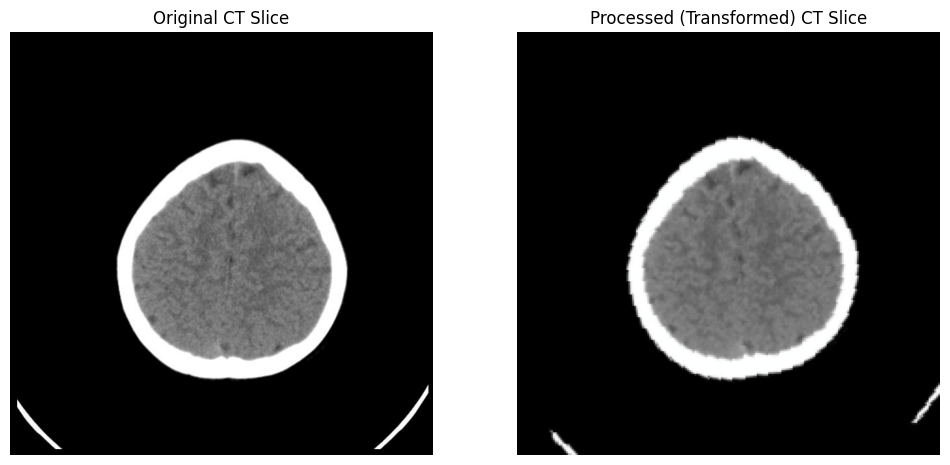

In [16]:
# Visualize random CT (original + processed)
import random

# Pick random index
idx = random.randint(0, len(train_df)-1)
row = train_df.iloc[idx]

img_path = row["image_path"]

# Load original
original_img = Image.open(img_path).convert("RGB")

# Apply transform
transformed_tensor = train_transform(original_img)
processed_img = tensor_to_image(transformed_tensor)

# Plot side-by-side
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(original_img, cmap="gray")
plt.title("Original CT Slice")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(processed_img)
plt.title("Processed (Transformed) CT Slice")
plt.axis("off")

plt.show()

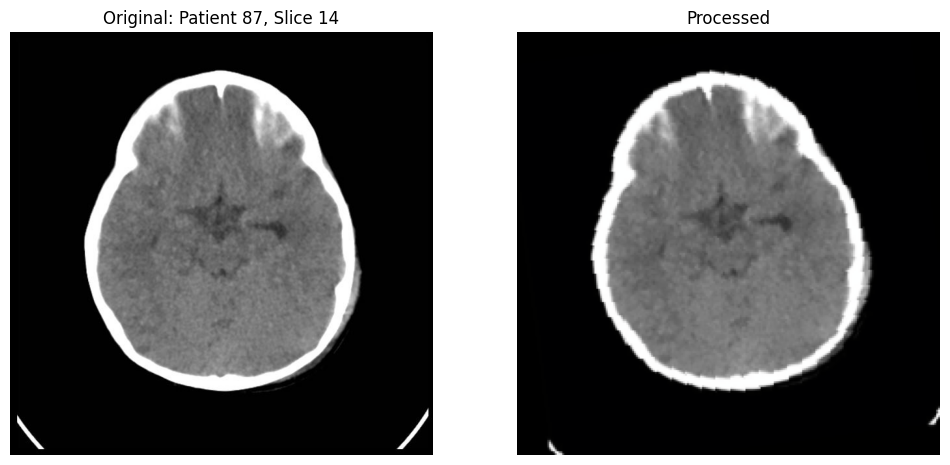

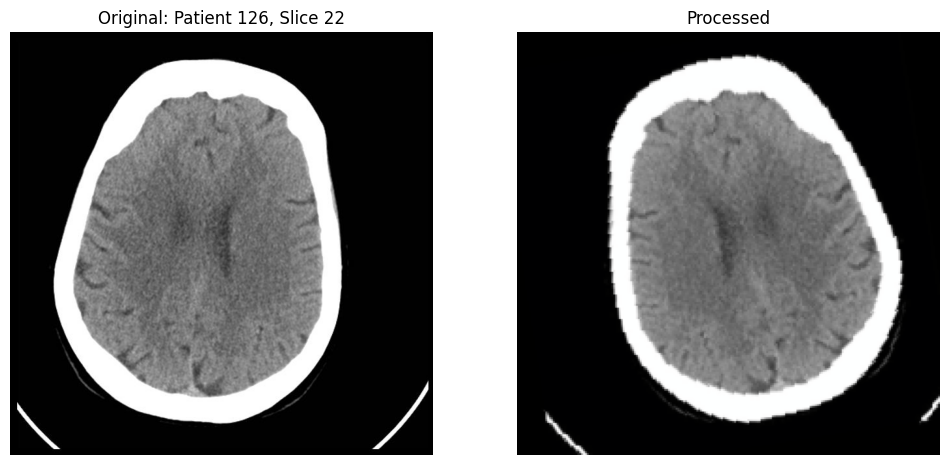

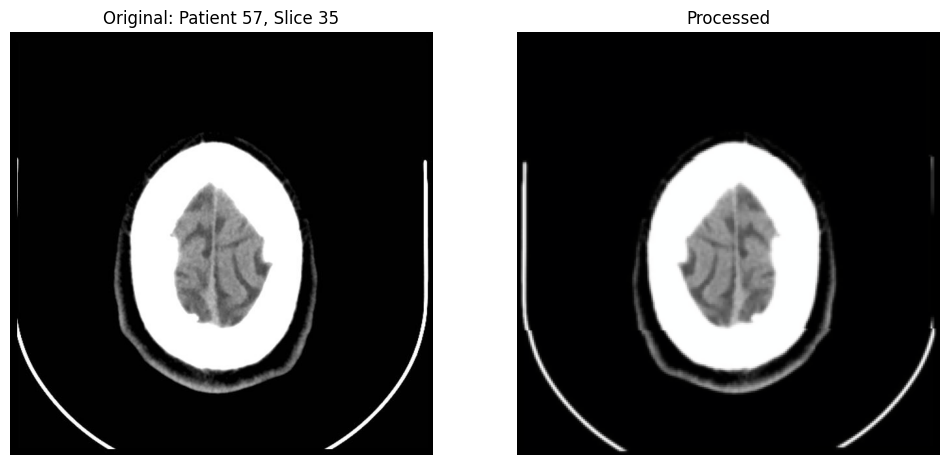

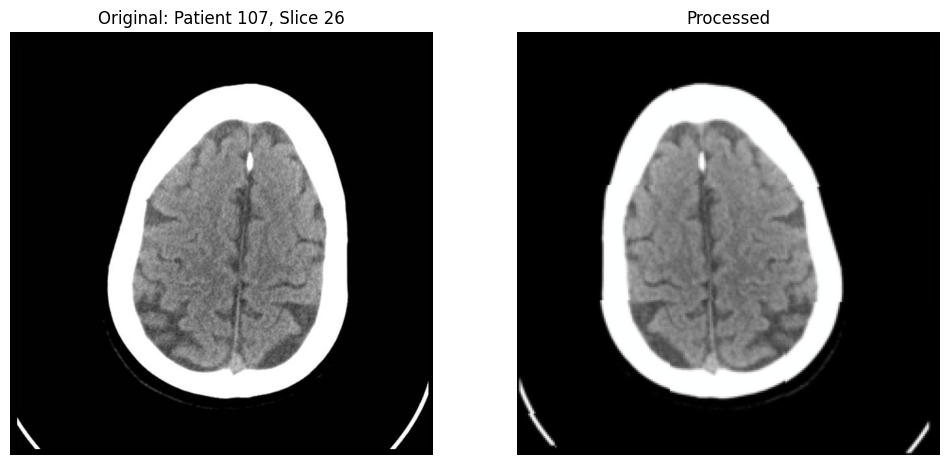

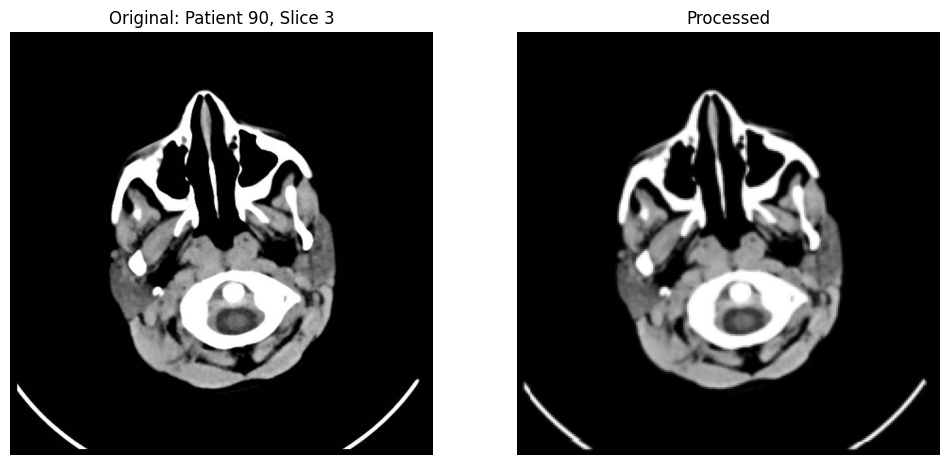

In [17]:
# Multiple visualizations
for _ in range(5):
    idx = random.randint(0, len(train_df)-1)
    row = train_df.iloc[idx]
    img_path = row["image_path"]

    original_img = Image.open(img_path).convert("RGB")
    transformed_tensor = train_transform(original_img)
    processed_img = tensor_to_image(transformed_tensor)

    plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)
    plt.imshow(original_img)
    plt.title(f"Original: Patient {row['PatientNumber']}, Slice {row['SliceNumber']}")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(processed_img)
    plt.title("Processed")
    plt.axis("off")

    plt.show()

In [18]:
# Build the Custom Dataset Class
class BrainHemorrhageDataset(Dataset):
    def __init__(self, df, transform=None, label_cols=None):
        self.df = df
        self.transform = transform
        self.label_cols = label_cols

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        # Load image
        img_path = row["image_path"]
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        # Labels as tensor (multi-label)
        labels = torch.tensor(row[self.label_cols].values.astype("float32"))

        return image, labels

In [19]:
# Create Dataset Objects
label_cols = [
    "Intraventricular", "Intraparenchymal",
    "Subarachnoid", "Epidural",
    "Subdural", "No_Hemorrhage",
    "Fracture_Yes_No"
]

train_dataset = BrainHemorrhageDataset(train_df, transform=train_transform, label_cols=label_cols)
val_dataset   = BrainHemorrhageDataset(val_df,   transform=val_transform,   label_cols=label_cols)
test_dataset  = BrainHemorrhageDataset(test_df,  transform=val_transform,   label_cols=label_cols)

In [20]:
# Create DataLoaders
BATCH_SIZE = 16

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset,   batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset,  batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

In [21]:
# Quick Test — Load One Batch
images, labels = next(iter(train_loader))
print("Image batch shape:", images.shape)
print("Label batch shape:", labels.shape)

Image batch shape: torch.Size([16, 3, 224, 224])
Label batch shape: torch.Size([16, 7])


## **Build & Train the Model**

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

# Load EfficientNet_B0 (pretained on ImageNet)
num_labels = 7  # Multi-label outputs

model = models.efficientnet_b0(weights="DEFAULT")
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_labels)

model = model.to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 169MB/s]


In [23]:
# Loss Function & Optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [24]:
# Training & Validation Loop
def train_one_epoch(model, train_loader, optimizer, criterion):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    return running_loss / len(train_loader.dataset)


def validate(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)

    return running_loss / len(val_loader.dataset)

## **Training Loop (Run for 5–10 epochs to test)**

In [25]:
EPOCHS = 10

best_val_loss = float("inf")

for epoch in range(EPOCHS):
    train_loss = train_one_epoch(model, train_loader, optimizer, criterion)
    val_loss   = validate(model, val_loader, criterion)

    print(f"Epoch {epoch+1}/{EPOCHS}")
    print(f"  Train Loss: {train_loss:.4f}")
    print(f"  Val Loss  : {val_loss:.4f}")

    # save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_model.pth")
        print("  --> Saved best model")

Epoch 1/10
  Train Loss: 0.2780
  Val Loss  : 0.1120
  --> Saved best model
Epoch 2/10
  Train Loss: 0.1155
  Val Loss  : 0.1066
  --> Saved best model
Epoch 3/10
  Train Loss: 0.0944
  Val Loss  : 0.1038
  --> Saved best model
Epoch 4/10
  Train Loss: 0.0792
  Val Loss  : 0.1112
Epoch 5/10
  Train Loss: 0.0715
  Val Loss  : 0.0981
  --> Saved best model
Epoch 6/10
  Train Loss: 0.0624
  Val Loss  : 0.1219
Epoch 7/10
  Train Loss: 0.0529
  Val Loss  : 0.1208
Epoch 8/10
  Train Loss: 0.0426
  Val Loss  : 0.1323
Epoch 9/10
  Train Loss: 0.0415
  Val Loss  : 0.1211
Epoch 10/10
  Train Loss: 0.0345
  Val Loss  : 0.1145


## **After training — Test the model**

In [26]:
# Load best model
model.load_state_dict(torch.load("best_model.pth"))
model.eval()

test_loss = validate(model, test_loader, criterion)
print("Test Loss:", test_loss)

Test Loss: 0.2529204407461597


## **Evaluation Metrics**

In [27]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import torch
import torch.nn.functional as F


# Collect predictions & labels from test set
def get_predictions(model, loader):
    model.eval()
    
    all_labels = []
    all_preds  = []

    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            labels = labels.cpu().numpy()
            
            outputs = model(images)
            probs = torch.sigmoid(outputs).cpu().numpy()  # convert logits → probabilities
            
            all_labels.append(labels)
            all_preds.append(probs)

    all_labels = np.vstack(all_labels)
    all_preds  = np.vstack(all_preds)
    
    return all_labels, all_preds

In [28]:
y_true, y_pred = get_predictions(model, test_loader)

In [29]:
# Compute Per-Label Metrics
label_names = [
    "Intraventricular", "Intraparenchymal",
    "Subarachnoid", "Epidural", "Subdural",
    "No_Hemorrhage", "Fracture_Yes_No"
]

print("=== Per-Label Metrics ===\n")

for i, label in enumerate(label_names):
    true  = y_true[:, i]
    pred  = y_pred[:, i]
    pred_bin = (pred > 0.5).astype(int)

    try:
        auc = roc_auc_score(true, pred)
    except:
        auc = "Undefined (only one class present)"

    acc = accuracy_score(true, pred_bin)
    prec = precision_score(true, pred_bin, zero_division=0)
    rec  = recall_score(true, pred_bin, zero_division=0)
    f1   = f1_score(true, pred_bin, zero_division=0)

    print(f"\nLabel: {label}")
    print(f"AUC       : {auc}")
    print(f"Accuracy  : {acc:.3f}")
    print(f"Precision : {prec:.3f}")
    print(f"Recall    : {rec:.3f}")
    print(f"F1 Score  : {f1:.3f}")

=== Per-Label Metrics ===


Label: Intraventricular
AUC       : 0.8418181818181818
Accuracy  : 0.979
Precision : 0.000
Recall    : 0.000
F1 Score  : 0.000

Label: Intraparenchymal
AUC       : 0.8253773253773254
Accuracy  : 0.925
Precision : 1.000
Recall    : 0.045
F1 Score  : 0.087

Label: Subarachnoid
AUC       : 0.8224242424242424
Accuracy  : 0.979
Precision : 0.000
Recall    : 0.000
F1 Score  : 0.000

Label: Epidural
AUC       : 0.8083989501312335
Accuracy  : 0.904
Precision : 0.500
Recall    : 0.185
F1 Score  : 0.270

Label: Subdural
AUC       : 0.7794676806083651
Accuracy  : 0.936
Precision : 0.000
Recall    : 0.000
F1 Score  : 0.000

Label: No_Hemorrhage
AUC       : 0.8820754716981132
Accuracy  : 0.801
Precision : 0.825
Recall    : 0.934
F1 Score  : 0.876

Label: Fracture_Yes_No
AUC       : 0.7839771101573677
Accuracy  : 0.829
Precision : 0.500
Recall    : 0.292
F1 Score  : 0.368


In [30]:
# Store metrics inside a list → DataFrame
import pandas as pd

metrics_list = []

for i, label in enumerate(label_names):
    true  = y_true[:, i]
    pred  = y_pred[:, i]
    pred_bin = (pred > 0.5).astype(int)

    try:
        auc = roc_auc_score(true, pred)
    except:
        auc = None  # better for plotting

    acc = accuracy_score(true, pred_bin)
    prec = precision_score(true, pred_bin, zero_division=0)
    rec  = recall_score(true, pred_bin, zero_division=0)
    f1   = f1_score(true, pred_bin, zero_division=0)

    metrics_list.append({
        "Label": label,
        "AUC": auc,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

metrics_df = pd.DataFrame(metrics_list)
metrics_df

,Label,AUC,Accuracy,Precision,Recall,F1 Score
0,Intraventricular,0.841818,0.978648,0.000,0.000000,0.000000
1,Intraparenchymal,0.825377,0.925267,1.000,0.045455,0.086957
2,Subarachnoid,0.822424,0.978648,0.000,0.000000,0.000000
3,Epidural,0.808399,0.903915,0.500,0.185185,0.270270
4,Subdural,0.779468,0.935943,0.000,0.000000,0.000000
5,No_Hemorrhage,0.882075,0.800712,0.825,0.933962,0.876106
6,Fracture_Yes_No,0.783977,0.829181,0.500,0.291667,0.368421


In [31]:
# Step 2 — Melt dataframe (for seaborn)
metrics_melted = metrics_df.melt(id_vars="Label", 
                                 var_name="Metric", 
                                 value_name="Score")
metrics_melted

,Label,Metric,Score
0,Intraventricular,AUC,0.841818
1,Intraparenchymal,AUC,0.825377
2,Subarachnoid,AUC,0.822424
3,Epidural,AUC,0.808399
4,Subdural,AUC,0.779468
5,No_Hemorrhage,AUC,0.882075
6,Fracture_Yes_No,AUC,0.783977
7,Intraventricular,Accuracy,0.978648
8,Intraparenchymal,Accuracy,0.925267
9,Subarachnoid,Accuracy,0.978648


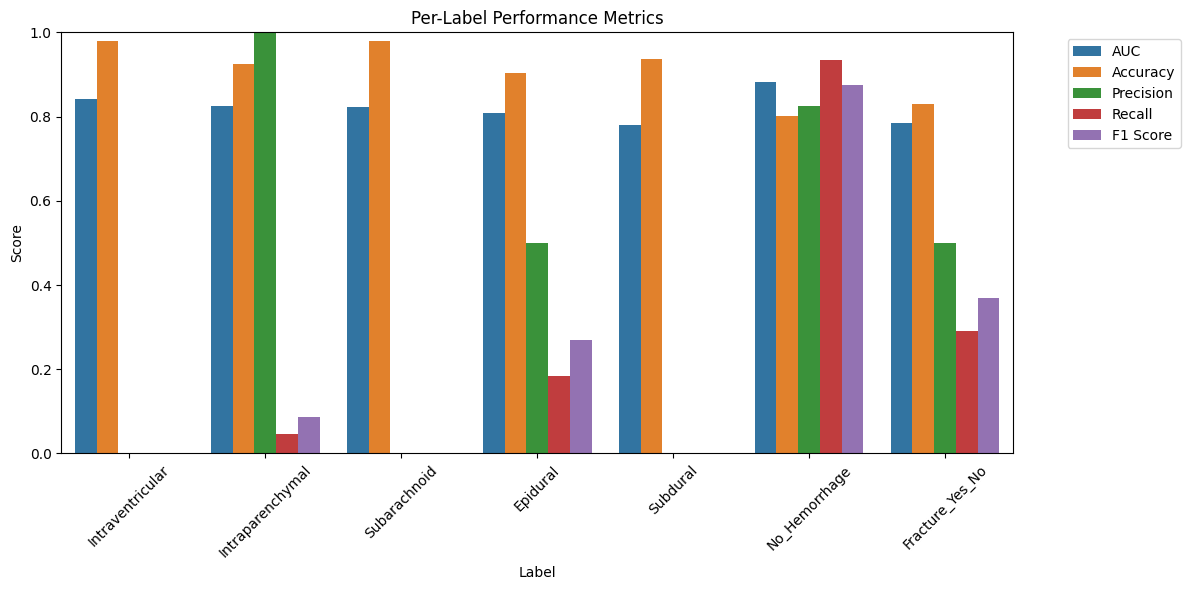

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=metrics_melted, x="Label", y="Score", hue="Metric")

plt.title("Per-Label Performance Metrics")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [33]:
#Macro & Micro Averages
# Binary predictions (threshold 0.5)
y_pred_bin = (y_pred > 0.5).astype(int)

macro_f1  = f1_score(y_true, y_pred_bin, average="macro", zero_division=0)
micro_f1  = f1_score(y_true, y_pred_bin, average="micro", zero_division=0)
macro_prec = precision_score(y_true, y_pred_bin, average="macro", zero_division=0)
micro_prec = precision_score(y_true, y_pred_bin, average="micro", zero_division=0)
macro_rec  = recall_score(y_true, y_pred_bin, average="macro", zero_division=0)
micro_rec  = recall_score(y_true, y_pred_bin, average="micro", zero_division=0)

print("\n=== Overall Metrics ===")
print(f"Macro F1       : {macro_f1:.3f}")
print(f"Micro F1       : {micro_f1:.3f}")
print(f"Macro Precision: {macro_prec:.3f}")
print(f"Micro Precision: {micro_prec:.3f}")
print(f"Macro Recall   : {macro_rec:.3f}")
print(f"Micro Recall   : {micro_rec:.3f}")


=== Overall Metrics ===
Macro F1       : 0.229
Micro F1       : 0.706
Macro Precision: 0.404
Micro Precision: 0.781
Macro Recall   : 0.208
Micro Recall   : 0.643


## **Confusion Matrix for No_Hemorrhage**

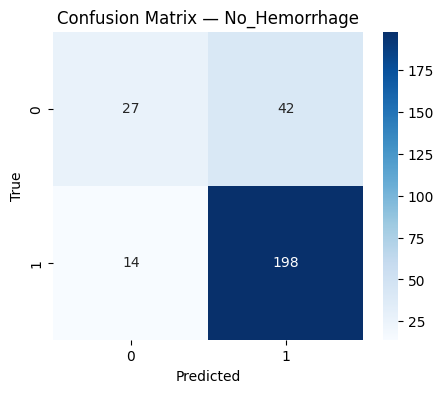

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

idx_no_h = label_names.index("No_Hemorrhage")
true_noh = y_true[:, idx_no_h]
pred_noh = y_pred_bin[:, idx_no_h]

cm = confusion_matrix(true_noh, pred_noh)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix — No_Hemorrhage")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

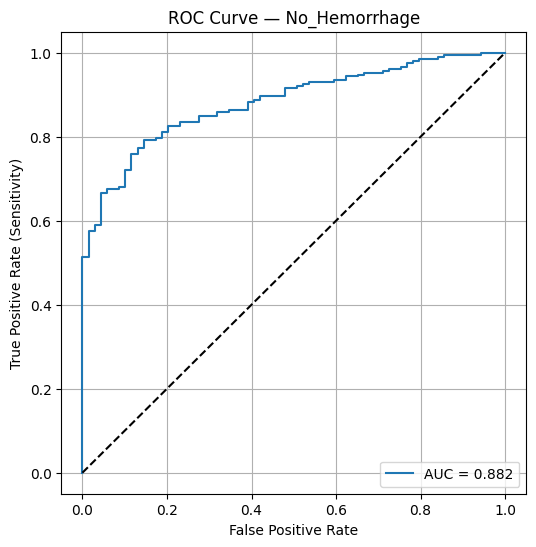

In [35]:
# ROC Curve for No_Hemorrhage
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Identify index for No_Hemorrhage
idx_no_h = label_names.index("No_Hemorrhage")

# Extract true values & predicted probabilities
true_noh = y_true[:, idx_no_h]
pred_noh = y_pred[:, idx_no_h]

# ROC data
fpr, tpr, thresholds = roc_curve(true_noh, pred_noh)
auc_score = roc_auc_score(true_noh, pred_noh)

# Plot
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], 'k--')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve — No_Hemorrhage")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

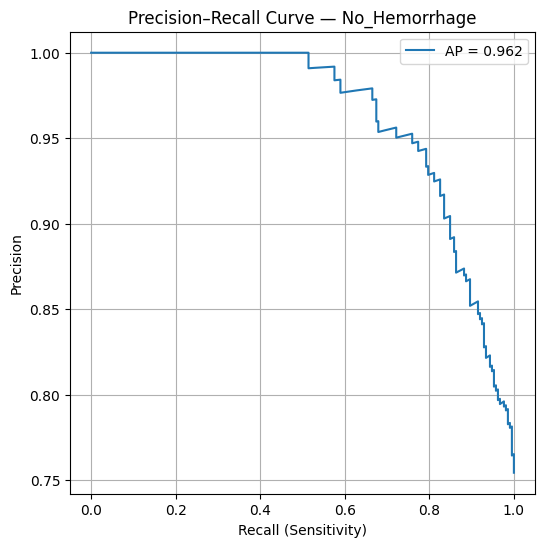

In [36]:
# Precision–Recall Curve for No_Hemorrhage
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds_pr = precision_recall_curve(true_noh, pred_noh)
ap_score = average_precision_score(true_noh, pred_noh)

plt.figure(figsize=(6,6))
plt.plot(recall, precision, label=f"AP = {ap_score:.3f}")
plt.xlabel("Recall (Sensitivity)")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve — No_Hemorrhage")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

## **Optimal Threshold Methods**

In [37]:
# Extract the No_Hemorrhage predictions
idx_no_h = label_names.index("No_Hemorrhage")
true_noh = y_true[:, idx_no_h]
pred_noh = y_pred[:, idx_no_h]

In [38]:
# Compute All Threshold Choices

#Best F1 Score
from sklearn.metrics import f1_score

thresholds = np.linspace(0.01, 0.99, 99)
f1_scores = []

for t in thresholds:
    preds = (pred_noh > t).astype(int)
    f1_scores.append(f1_score(true_noh, preds))

best_f1_idx = np.argmax(f1_scores)
best_f1_threshold = thresholds[best_f1_idx]
best_f1_value = f1_scores[best_f1_idx]

print("Best F1 Threshold:", best_f1_threshold)
print("Best F1 Score:", best_f1_value)

Best F1 Threshold: 0.61
Best F1 Score: 0.8828828828828829


In [39]:
# Youden’s J Statistic (ROC-based)
from sklearn.metrics import roc_curve

fpr, tpr, roc_thresholds = roc_curve(true_noh, pred_noh)
youden_j = tpr - fpr
best_j_idx = np.argmax(youden_j)
best_j_threshold = roc_thresholds[best_j_idx]

print("Best Youden’s J Threshold:", best_j_threshold)
print("Youden J Value:", youden_j[best_j_idx])

Best Youden’s J Threshold: 0.9165708
Youden J Value: 0.6475252939567953


In [40]:
# Closest Point to (0,1) in ROC space
distances = np.sqrt((fpr - 0)**2 + (tpr - 1)**2)
best_roc_idx = np.argmin(distances)
best_roc_threshold = roc_thresholds[best_roc_idx]

print("Best ROC Distance Threshold:", best_roc_threshold)

Best ROC Distance Threshold: 0.9165708


In [41]:
# Precision-Recall F1 Max (same as #1 but plotted)
from sklearn.metrics import precision_recall_curve

prec, rec, pr_thresholds = precision_recall_curve(true_noh, pred_noh)
f1_pr = 2 * (prec * rec) / (prec + rec + 1e-8)

best_pr_idx = np.argmax(f1_pr)
best_pr_threshold = pr_thresholds[best_pr_idx]

print("Best PR-F1 Threshold:", best_pr_threshold)
print("Best PR-F1 Score:", f1_pr[best_pr_idx])

Best PR-F1 Threshold: 0.66266704
Best PR-F1 Score: 0.8838268742769082


In [42]:
# Show All Thresholds Together
print("\n========== Optimal Thresholds ==========")
print(f"Best F1 Threshold          : {best_f1_threshold:.3f}")
print(f"Best Youden J Threshold    : {best_j_threshold:.3f}")
print(f"Best ROC Distance Threshold: {best_roc_threshold:.3f}")
print(f"Best PR-F1 Threshold       : {best_pr_threshold:.3f}")
print("========================================\n")


========== Optimal Thresholds ==========
Best F1 Threshold          : 0.610
Best Youden J Threshold    : 0.917
Best ROC Distance Threshold: 0.917
Best PR-F1 Threshold       : 0.663



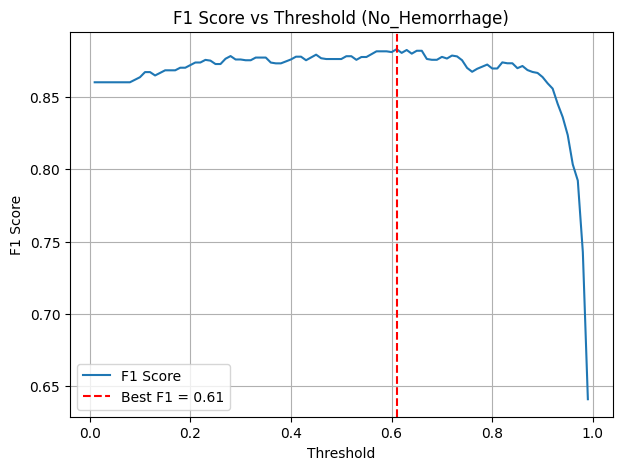

In [43]:
# Plot F1 vs Threshold (Highly Useful)
plt.figure(figsize=(7,5))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.axvline(best_f1_threshold, color='red', linestyle='--', label=f'Best F1 = {best_f1_threshold:.2f}')
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Threshold (No_Hemorrhage)")
plt.legend()
plt.grid(True)
plt.show()

## **compute the Confusion Matrix at a SAFE Sensitivity Threshold**

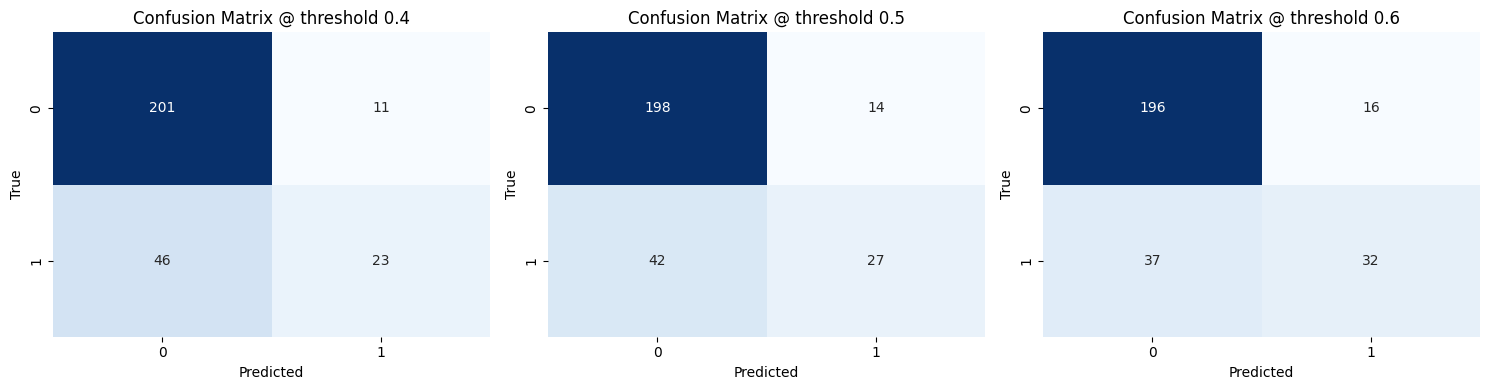

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_cm_for_threshold(ax, thresh):
    pred_bin = (pred_noh < thresh).astype(int)  # <thresh = predicts hemorrhage
    # Flip: hemorrhage = 1
    y_true_hemo = 1 - true_noh
    y_pred_hemo = 1 - (pred_noh > thresh).astype(int)

    cm = confusion_matrix(y_true_hemo, y_pred_hemo)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax, cbar=False)
    ax.set_title(f"Confusion Matrix @ threshold {thresh}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

# thresholds to compare
thresholds = [0.4, 0.5, 0.6]

# create subplots side by side
fig, axes = plt.subplots(1, len(thresholds), figsize=(15, 4))

for ax, t in zip(axes, thresholds):
    plot_cm_for_threshold(ax, t)

plt.tight_layout()
plt.show()

The initial multi-label model was abandoned because it demonstrated clinically unacceptable sensitivity, consistently missing a large proportion of hemorrhage-positive slices across all thresholds. Despite strong specificity, the high false-negative rate made the model unsuitable for medical decision support. These limitations were traced to data imbalance and multi-label learning complexity. Consequently, a new two-stage approach—binary hemorrhage detection followed by subtype classification—was adopted to ensure higher sensitivity and more reliable clinical performance.